In [134]:
import pandas as pd
import numpy as np

In [135]:
data_dict= pd.read_excel('../input/gemstone-price-prediction/Data Dictionary.xlsx')

In [188]:
data_dict

,Variable Name,Description
0,Carat,Carat weight of the cubic zirconia.
1,Cut,Describe the cut quality of the cubic zirconi...
2,Color,Colour of the cubic zirconia.With D being the...
3,Clarity,cubic zirconia Clarity refers to the absence ...
4,Depth,"The Height of a cubic zirconia, measured from..."
5,Table,The Width of the cubic zirconia's Table expre...
6,Price,the Price of the cubic zirconia.
7,X,Length of the cubic zirconia in mm.
8,Y,Width of the cubic zirconia in mm.
9,Z,Height of the cubic zirconia in mm.


In [208]:
data_dict.Description[5]

"\xa0The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter."

In [137]:
df= pd.read_csv('../input/gemstone-price-prediction/cubic_zirconia.csv')

In [138]:
df.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [140]:
df.describe()

,Unnamed: 0,carat,depth,table,x,y,z,price
count,26967.000000,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,13484.000000,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,7784.846691,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,1.000000,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,6742.500000,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,13484.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,20225.500000,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,26967.000000,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [141]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [174]:
sns.set (rc= {'figure.figsize': (11.7,8.27)}) 
sns.set_palette('vlag')
sns.set_style('white')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='carat', ylabel='Density'>

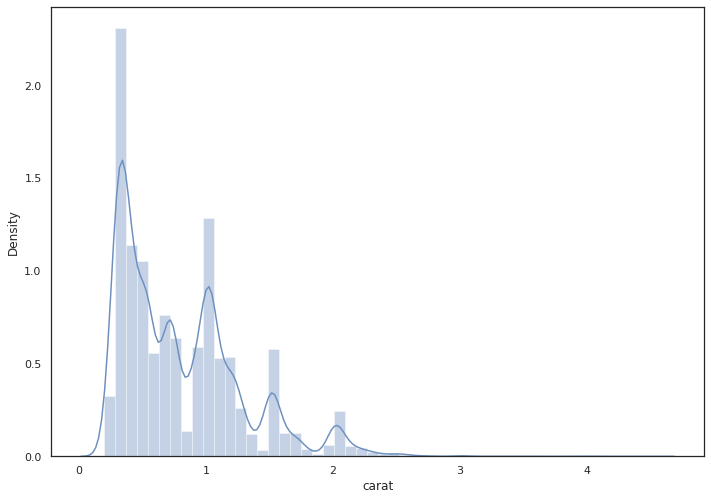

In [143]:
sns.distplot(df['carat'])

In [144]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z', 'price'],
      dtype='object')

<AxesSubplot:xlabel='cut', ylabel='price'>

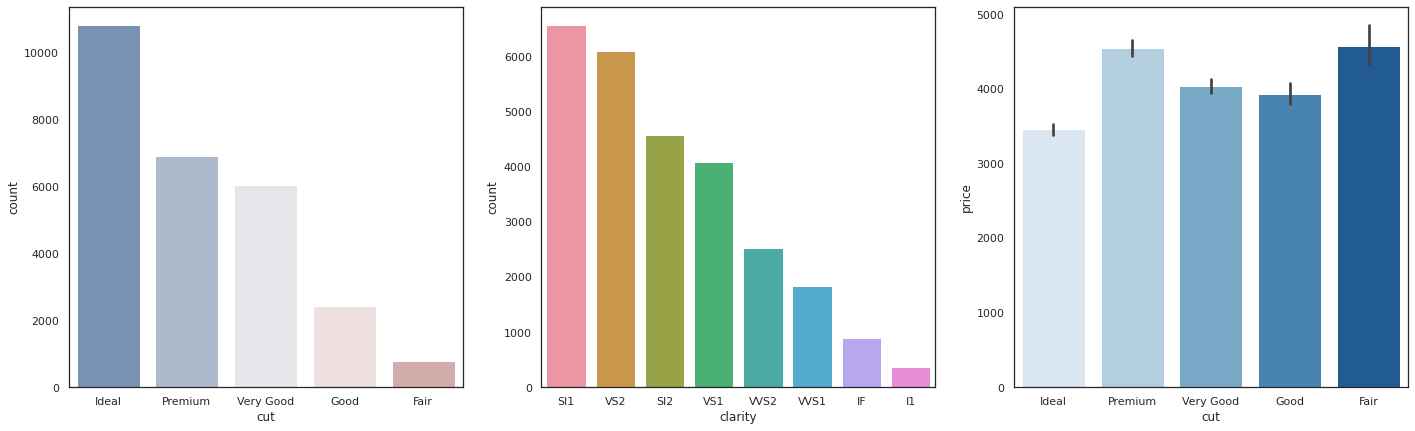

In [159]:
plt.figure(figsize=(24,7))
plt.subplot(131)
sns.countplot(x='cut',data=df)
plt.subplot(132)
sns.countplot(x='clarity',data=df,order=df['clarity'].value_counts().index)
plt.subplot(133)
sns.barplot(x='cut',y='price',data=df,palette='Blues')

In [160]:
pd.crosstab(index=df['cut'],columns=df['clarity']).apply(lambda r : round(r/r.sum()*100,2),axis=1)

clarity,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
cut,,,,,,,,
Fair,11.40,0.51,24.71,28.81,11.91,16.52,1.28,4.87
Good,2.09,1.23,31.34,21.71,13.56,20.11,4.10,5.86
Ideal,0.68,5.67,19.88,12.24,16.49,23.37,9.58,12.08
Premium,1.57,1.67,26.22,21.00,14.47,24.60,4.45,6.03
Very Good,0.71,2.19,27.43,17.36,14.71,20.80,6.40,10.40


### Conclusion 1:
* Maximum accounts for having ideal,followed by premium , very good and so on .
* Though IF has maximum clarity ( which is premium feature in clarity ) , people have choosen SI1, VS2, SI2,so on. It is evident from from the thrid graph it has impacted the prices as premium has max average price followed by fair and ideal has least average price considering the number of buyers for all 'cut' category.

In [186]:
round(df.groupby('color')['color'].value_counts().sort_values(ascending=False)/df.shape[0]*100,2)

color  color
G      G        20.99
E      E        18.23
F      F        17.54
H      H        15.21
D      D        12.40
I      I        10.28
J      J         5.35
Name: color, dtype: float64

<AxesSubplot:xlabel='color', ylabel='count'>

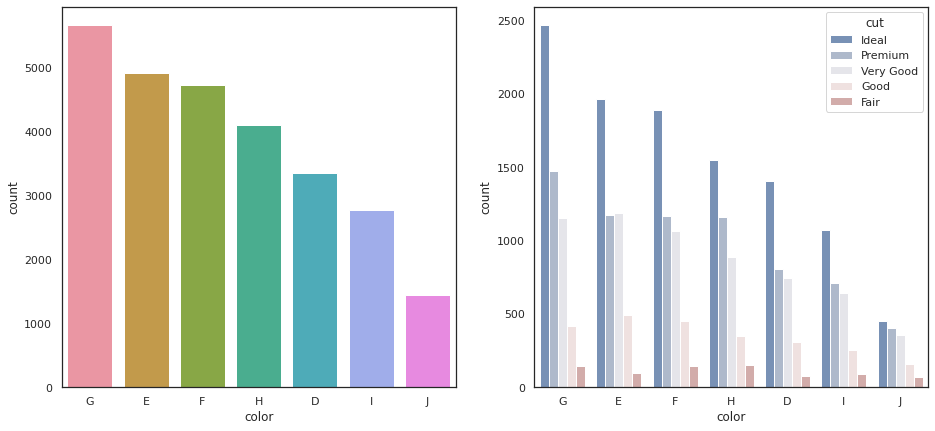

In [196]:
plt.figure(figsize=(24,7))
plt.subplot(131)
sns.countplot(x='color',data=df,order=df['color'].value_counts().index)
plt.subplot(132)
sns.countplot(x='color',data=df,order=df['color'].value_counts().index,hue='cut')

In [197]:
pd.crosstab(index=df['color'],columns=df['clarity']).apply(lambda r : round(r/r.sum()*100,2),axis=1)

clarity,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
color,,,,,,,,
D,0.75,1.14,31.10,20.07,11.03,24.04,3.62,8.25
E,1.10,1.77,25.40,17.27,12.71,24.45,6.96,10.35
F,1.42,3.87,23.01,15.92,14.21,23.41,7.61,10.55
G,1.20,6.04,17.68,13.76,19.04,21.29,8.96,12.03
H,2.00,3.63,26.38,19.41,14.51,19.60,7.02,7.46
I,1.73,2.49,26.16,16.93,17.32,21.76,6.60,7.00
J,1.46,1.80,26.75,17.88,18.99,25.92,2.63,4.57


In [199]:
pd.crosstab(index=df['cut'],columns=df['color']).apply(lambda r : round(r/r.sum()*100,2),axis=1)

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,9.48,12.80,18.95,18.82,19.21,12.04,8.71
Good,12.74,20.11,18.60,17.17,14.42,10.36,6.60
Ideal,13.03,18.18,17.50,22.84,14.35,9.92,4.19
Premium,11.71,17.02,16.92,21.32,16.83,10.31,5.90
Very Good,12.31,19.67,17.69,19.14,14.71,10.61,5.87


#### **Conclusion 2** : Majority of color grade used are G, E and F which accounts for 60 % in each cut. 

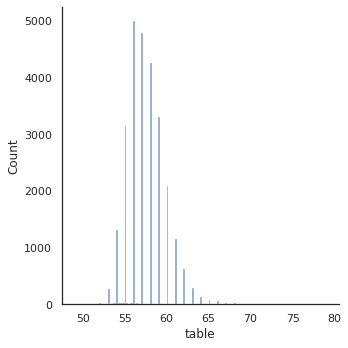

In [206]:
sns.displot(df['table'])

#### **Conclusion 3** :
*     Majority of the people had % of average diameter between 55 to 60 percent. 